<a href="https://colab.research.google.com/github/BrettScheuermann/Dida325/blob/main/Prieto%2C_Spiegel%2C_Scheuermann_Final_Project_DIDA_325_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team: Amiel Prieto, Zach Spiegel, and Brett Scheuermann

# 1. Introduction

## Origin of Dataset

This dataset, which was downloaded from [Kaggle](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales), contains a record of "every building sold in the New York City property market over a 12-month period".

The data was uploaded by the City of New York's Kaggle Account and originates from the [New York City Department of Finance's Rolling Sales dataset](https://www.nyc.gov/site/finance/taxes/property-rolling-sales-data.page).

## Why this dataset?

Housing Prices in the US have been increasing year after year and it is important to ascertain what causes a property to have a much higher sale price than others. The median house price in the US in 2019 was \$322k and the median in 2022 was \$458k. Housing prices are increasing so quickly because homeowners aren't willing to give up the mortgages they have that are locked in at such lower prices, so the housing supply remains very low; which causes a snowball effect as less and less people are able to afford housing. We want to know which properties are the most expensive and what factors are the most important to a properties sale price. This dataset from kaggle contains various information about certain properties which were sold in the NYC area. Each column contains key information regarding the property that was sold such as the land square feet, the number of units, the borough, and more. So using this dataset we will figure out what is the most important features of a NYC property when determining the sale price to try and give people trying to buy and sell houses a better idea of what features are most and least important.

## Questions:
* Do older buildings have more or less square feet than newer ones? (data visualization and dplyr)
* What clusters can be found based on the numeric variables? (units, square feet, sale price) (clustering)
* Do residential units and/or commercial units have correlations with the sale price? If so, which has a greater impact on price?
* Using the variables in the dataset, can we predict the sales price of buildings in NYC? (multivariate regresion)

# 2. Dataset

## Row description

Each row represents one building or building unit sold (including but not limited to: apartments, houses, warehouses, hotels, hospitals, offices...)

## Column descriptions

* Borough (Categorical) - Which of the five boroughs this building resides in
* Neighborhood (Categorical) - The general area in a borough this building is located
* Residential Units (Numeric) - The number of residential apartments(Units for living purposes) in the building
* Commercial Units (Numeric) - The number of commercial apartments(Units for business purposes) in the building
* Total Units (Numeric) - The total number of units in the building
* Land Square Feet (Numeric) - The total land of the property
* Gross Square Feet (Numeric) - The total area of the floor including the land area and any space within any building or structure
* Year Built (Categorical) - The year the property was built
* Sale Price (Numeric) - Monetary value the property was sold for
* Tax Class at Present (Categorical) - Describes use of property (1 and 2 are residential), as of today
* Building Class at Present (Categorical) - The type of buIlding, as of today
* Building Class at Time of Sale (Categorical) - The class of the building(Constructive use) at the time of sale
* Tax Class at Time of Sale (Categorical) - The tax class of the building at the time of sale





## Installation and Loading of Necessary Libraries:

In [1]:
install.packages("GGally")
install.packages("corrplot")
install.packages("randomForest")
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [2]:
library(dplyr)
library(ggplot2)
library(GGally)
library(corrplot)
library(randomForest)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




## Loading in the data

In [3]:
nyc = read.csv("https://raw.githubusercontent.com/zachspiegel/dida325/main/nyc-rolling-sales.csv")

## Removing Columns and Cleaning Dataset

In [4]:
nyc = nyc %>% select(BOROUGH, NEIGHBORHOOD, BUILDING.CLASS.CATEGORY, TAX.CLASS.AT.PRESENT, BUILDING.CLASS.AT.PRESENT, RESIDENTIAL.UNITS, COMMERCIAL.UNITS, TOTAL.UNITS, LAND.SQUARE.FEET, GROSS.SQUARE.FEET, YEAR.BUILT, TAX.CLASS.AT.TIME.OF.SALE, BUILDING.CLASS.AT.TIME.OF.SALE, SALE.PRICE)

# selecting only applicable columns

In [5]:
nyc$SALE.PRICE <- as.numeric(nyc$SALE.PRICE) #Turning sale price into a numeric variable

nyc$LAND.SQUARE.FEET <- as.numeric(nyc$LAND.SQUARE.FEET	) #Turning land square feet into a numeric variable

nyc$GROSS.SQUARE.FEET	 <- as.numeric(nyc$GROSS.SQUARE.FEET) #Turning gross square feet into a numeric variable

nyc <- nyc %>% filter(SALE.PRICE != "-") #Removing dashes(NA values) in sale price column

nyc <- nyc %>% filter(LAND.SQUARE.FEET != 'NA') #Removing NA values in land square feet column

nyc <- nyc %>% filter(GROSS.SQUARE.FEET != 'NA') #Removing NA values in gross square feet column

nyc = nyc %>% filter(YEAR.BUILT != 0) #There are 0's in the sale price for undisclosed reasons such as transfers
                                      #of ownership, we removed these as they are detrimental to our analysis

nyc$BOROUGH <- as.factor(nyc$BOROUGH) #Turning borough into a factor variable

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [6]:
head(nyc,3)

,BOROUGH,NEIGHBORHOOD,BUILDING.CLASS.CATEGORY,TAX.CLASS.AT.PRESENT,BUILDING.CLASS.AT.PRESENT,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,TAX.CLASS.AT.TIME.OF.SALE,BUILDING.CLASS.AT.TIME.OF.SALE,SALE.PRICE
,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633,6440,1900,2,C2,6625000
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272,6794,1913,2,C4,3936272
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369,4615,1900,2,C2,8000000


In [7]:
nyc_numeric <- nyc %>% select(RESIDENTIAL.UNITS, COMMERCIAL.UNITS, TOTAL.UNITS, LAND.SQUARE.FEET, GROSS.SQUARE.FEET, YEAR.BUILT, SALE.PRICE)

## Number of Rows and Columns in the Dataset

In [8]:
nrow(nyc)
# 45,333 rows

[1] 45333

In [9]:
ncol(nyc)
# 14 columns

[1] 14

# 3. Code and Analysis

## 3.1 Do older buildings have more or less square feet than newer ones? (data visualization and dplyr)

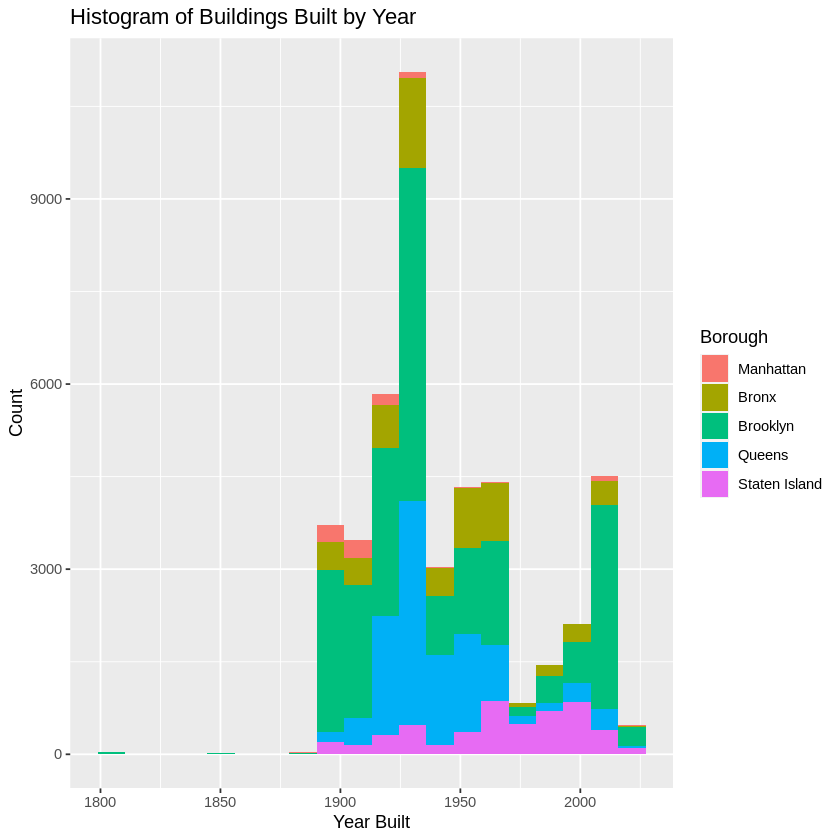

In [10]:
ggplot(nyc) +
  geom_histogram(aes(x = YEAR.BUILT, fill = BOROUGH), bins = 20) +
  scale_fill_discrete(labels=c('Manhattan', 'Bronx', 'Brooklyn', "Queens", "Staten Island")) + # how to change legend labels: https://www.statology.org/ggplot-legend-labels/#:~:text=You%20can%20use%20the%20following,use%20this%20syntax%20in%20practice.
  xlab("Year Built") +
  ylab("Count") +
  ggtitle("Histogram of Buildings Built by Year") +
  labs(fill="Borough") # change legend title: https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot

### Discussion

By looking at the histogram: Most buildings were built just before or right after 1900, most new buildings were built in Brookyln, Manhattan has the least amount of new buildings, and the peak of new buildings was around 1925. The Roaring Twenties may explain the peak in the histogram.

After the aftermath of World War I, the United States underwent through a period of economic and cultural prosperity, especially in major cities (like NYC). New technologies led to growth of the manufacturing and construction industries, affecting how new buildings can be built. Skyscrapers, constructed with "modern" materials such as steel, concrete, and aluminum, contributed to mass urbanization during the 1920s.




In [11]:
decade = nyc %>% select(LAND.SQUARE.FEET, GROSS.SQUARE.FEET, YEAR.BUILT) %>% mutate(Decade = floor(YEAR.BUILT/10)*10)

decade = decade %>% filter(Decade >= 1890)
# Will exclude any buildings built before the 1890's, since there are very few data points

decade$Decade <- as.character(decade$Decade)
# Convert into characters (so data is categorical and not numerical)

head(decade)

,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,Decade
,<dbl>,<dbl>,<int>,<chr>
1,1633,6440,1900,1900
2,2272,6794,1913,1910
3,2369,4615,1900,1900
4,1750,4226,1920,1920
5,4489,18523,1920,1920
6,3717,12350,2009,2000


In [12]:
box1 <- ggplot(decade) +
  geom_boxplot(aes(x = Decade, y = log(LAND.SQUARE.FEET),  color = Decade)) +
  xlab("Decade") +
  ylab("Log Land Square Feet") +
  ggtitle("Boxplot of Log Land Square Feet by Decade") +
  ylim(5, 15.5) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [13]:
box2 <- ggplot(decade) +
  geom_boxplot(aes(x = Decade, y = log(GROSS.SQUARE.FEET),  color = Decade)) +
  xlab("Decade") +
  ylab("Log Gross Square Feet") +
  ggtitle("Boxplot of Log Gross Square Feet by Decade") +
  ylim(5, 15.5) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Warning message:
“Removed 8295 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 8473 rows containing non-finite values (`stat_boxplot()`).”


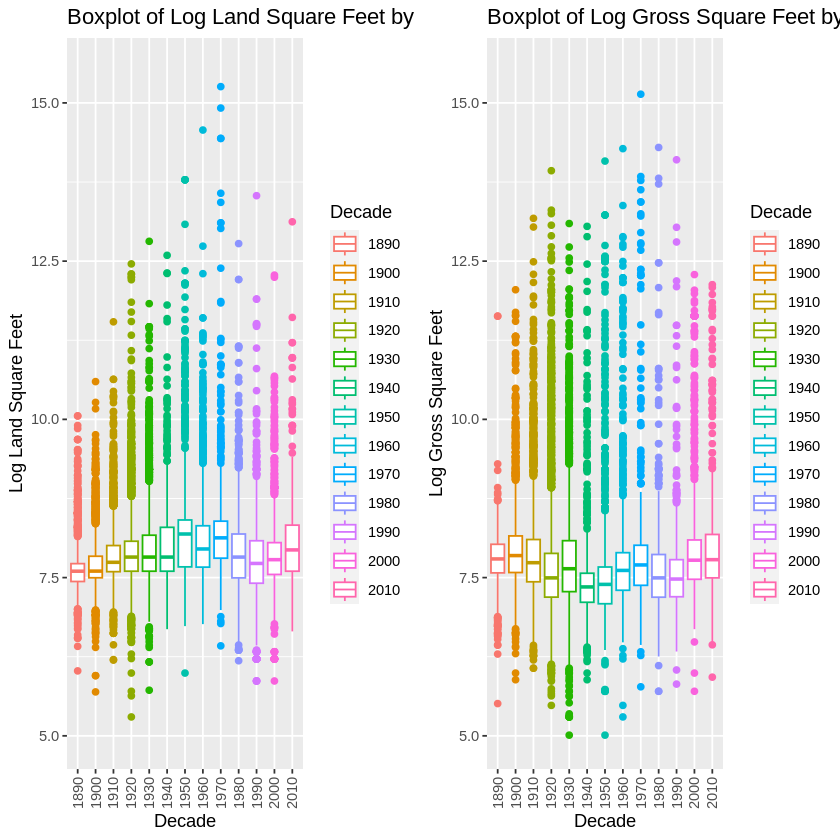

In [14]:
ggarrange(box1, box2)

### Discussion

By looking at the 2 boxplots: For the most part, Gross Square Feet is larger than Land Square Feet (which is not surprising). Outliers exist for smaller and larger square footage for almost every decade. Land Square Feet and Gross Square Feet are highest in the 1970s. Land Square Feet has generally increased from the 1890s to 1970s. Land Square Feet has generally decreased from the 1970s to the 1990s, and then began to increase again into the 2010s. Interesting trend in Gross Square Feet: Gross Square Feet has both increased and decreased over time. There is a large dip in Gross Square Feet from the 1930s into the 1940s and 1950s

Land Square Feet might follow the population trend, as seen [here](https://www.nyc.gov/assets/planning/download/pdf/data-maps/nyc-population/historical-population/nyc_total_pop_1900-2010.pdf). As the population of NYC increases, the need for larger buildings also increases. Following World War II and into the 1950s, the International Style of Architecture became popular. Rejecting previous ornate styles, functionality and standardization was prioritized. This could explain why there is an increase in Land Square Feet, but a decrease in Gross Square Feet during these decades. These graphs help to illustrate why properties that were constructed at around the mid 1900's will likely have the highest sale price because these properties generally have the land square feet.



## 3.2 What clusters can be found based on the numeric variables?  (units, square feet, sale price) (clustering)

Clusters can be very useful for determining if there are any patterns in the data. The clusters created from 6 numeric columns can tell us if there are any trends in the numeric variables, and if there are any relationships when determining sale price. This will be useful for determining a machine learning algorithm later. First we need to remove the year built and tax class at time of sale columns, take the numeric columns, and scale the data:

In [15]:
nyc_numeric_wo_year <- nyc %>% select(-YEAR.BUILT, -TAX.CLASS.AT.TIME.OF.SALE) %>% select_if(is.numeric) %>% scale()

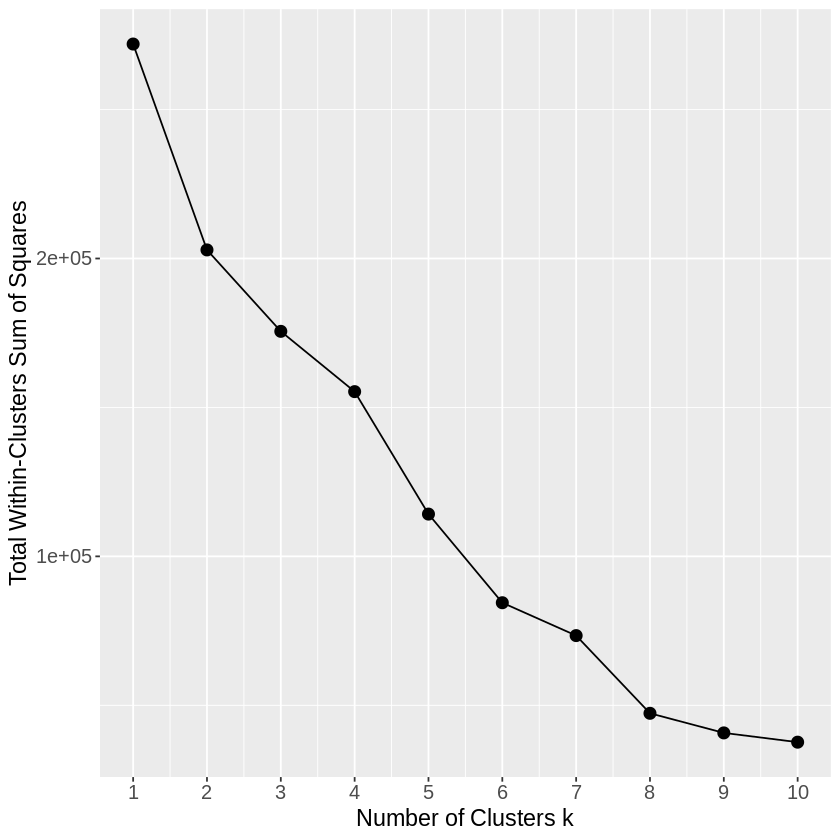

In [16]:
k.max <- 10
data <- nyc_numeric_wo_year


wss <- sapply(1:k.max,
              function(k){kmeans(data, k, nstart=10,iter.max = 15)$tot.withinss})
wss.data <- data.frame(k=1:k.max, wss=wss)
ggplot(wss.data) +
  geom_line(aes(x=k, y=wss)) +
  geom_point(aes(x=k, y=wss), size=3) +
  xlab("Number of Clusters k") +
  ylab("Total Within-Clusters Sum of Squares") +
  theme(axis.title=element_text(size=14), axis.text=element_text(size=12)) +
  scale_x_continuous(breaks=seq(1,k.max,1))

The output of this graph tells us to use 4 clusters when analyzing the data because of the elbow at the 4 on the Number of Clusters k axis.

In [17]:
kclust <- kmeans(nyc_numeric_wo_year, 4, nstart=10)

kclust_summary <- list(
  centers = kclust$centers,
  size = kclust$size
)

print(kclust_summary)

$centers
  RESIDENTIAL.UNITS COMMERCIAL.UNITS TOTAL.UNITS LAND.SQUARE.FEET
1       -0.03038808      -0.00960687  -0.0306518      -0.01942997
2       -0.14993631       3.78120594   1.8799138      35.05317792
3        7.97978124       1.88643486   7.7109779       3.79029087
4       44.75889276      17.16517318  46.7512104      16.66532745
  GROSS.SQUARE.FEET SALE.PRICE
1       -0.03152709 -0.0140351
2       26.85847698 40.7753807
3        8.89592345  2.4190785
4       23.02806206  4.5243887

$size
[1] 45208     8   105    12



There are varying results as far as the way the clusters can fall, but the main takeaways are: There is generally one cluster which has an above average amount of land, but not many units, however is still priced incredibly high as compared to the other clusters. Another cluster also has a very high number of units but with smaller amounts of land and has a much lower sale price then the previously mentioned cluster. The other two clusters have much less units overall, less land, and have a lower sale price.

Possible explanations to why these clusters are the way they are: The cluster with the highest sale price are properties that don't have a ton of residential or commercial units but have a ton of land, and are likely large and expensive private properties owned by the upper class. The buildings with a lot of residential and or commercial units are condos or large apartment complexes that aren't as expensive as the previous cluster, but have a lot of units with many people living in the building. The other two clusters are much smaller overall in every category and are likely smaller houses or apartments occupied by middle and lower class families.

Looking at these clusters, you would expect there to be one cluster with a ton of units, taking up a ton of land and having a really high sale price, we would expect another cluster to have slightly smaller numbers in every category than the large cluster, but that isn't the case. The cluster with the highest number of units doesn't have the highest sale price. The only clear relationship is that the clusters with the largest amount of land have the highest sale price.

So there are a lot of factors that can effect these clusters and there isn't a linear relationship that can be drawn to identify what exactly changes sale price. This can be seen from the cluster with a high number of commercial units having a low sale price, which goes against our intuition that just having the most units and land will correlate to the highest sale price.

## 3.3 Do residential units and/or commercial units have correlations with the sale price? If so, which has a greater impact on price?

First we remove all of the non-numeric columns, scale the data, and turn the matrix into a dataframe.

In [18]:
nyc_numeric <- nyc %>% select(-TAX.CLASS.AT.TIME.OF.SALE) %>% select_if(is.numeric) %>% scale()
nyc_numeric <- as.data.frame(nyc_numeric)

Then we want to make sure that the correlation between sale price and the number of units on the property is significant.

In [19]:
cor.test(nyc_numeric$COMMERCIAL.UNITS, nyc_numeric$SALE.PRICE)


	Pearson's product-moment correlation

data:  nyc_numeric$COMMERCIAL.UNITS and nyc_numeric$SALE.PRICE
t = 10.147, df = 45331, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03841376 0.05678286
sample estimates:
       cor 
0.04760233 


In [20]:
cor.test(nyc_numeric$RESIDENTIAL.UNITS, nyc_numeric$SALE.PRICE)


	Pearson's product-moment correlation

data:  nyc_numeric$RESIDENTIAL.UNITS and nyc_numeric$SALE.PRICE
t = 26.605, df = 45331, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1149194 0.1330472
sample estimates:
      cor 
0.1239937 


We can see from the cor.test lines with residential and commercial units that the p-value < $2.2e^{-16}$, which means that the correlation between sale price and these variables is statistically significant. Now to figure out which units effect sale price more.

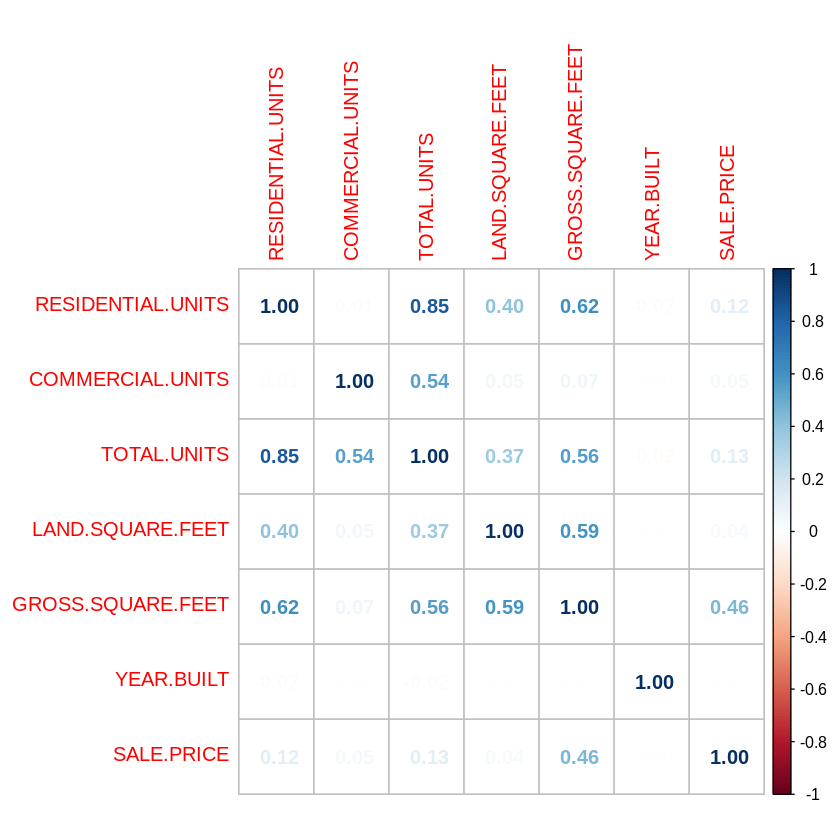

In [23]:
correlations <- cor(nyc_numeric)

corrplot(correlations, method = 'number')

As we can see from this correlation plot, residential units has a positive correlation of .12 with sale price and commercial units has a correlation of .05 with sale price. This could indicate that a property containing more residential units than commercial units will have a higher sale price. However digging a little deeper into recent news, spectrum news speculates an after effect of the COVID-19 pandemic  is altering the way New Yorkers work. With many workers working from home leaving NYC offices vacated; this is leading to higher costs and decreased revenue and property owners are forced to hand the keys back to the lender. This is leading sale prices of commercial buildings to fluctuate and is the reason they are selling for less.

Another interesting correlation to point out is the relationship between the total land and the type of units a property has. It would appear that there is a large correlation between land and residential units, and much less of a correlation between commercial units and land. This also could be an explanation as to why residential housing is selling for higher prices; because the residential units have significantly more land than commercial units. And as we learned from the clusters more land generally means higher sale price.

## 3.4 Using the variables in the dataset, can we predict the sales price of buildings in NYC? (multivariate regresion)

In [21]:
#Splitting of the data into training and testing sets
train_entries <- sample(nrow(nyc), nrow(nyc)*0.8)

nyc_train <- nyc[ train_entries,]
nyc_test  <- nyc[-train_entries,]

We decided to use a random forest model because there is a lack of linearity in the relationship of the variables to sale price. So this ruled out using a linear regression model, and we just want to increase the accuracy as much as possible so we used a random forest over a decision tree model.

In [22]:
model <- randomForest(SALE.PRICE ~., data=nyc_train)

#### Model Evaluation:

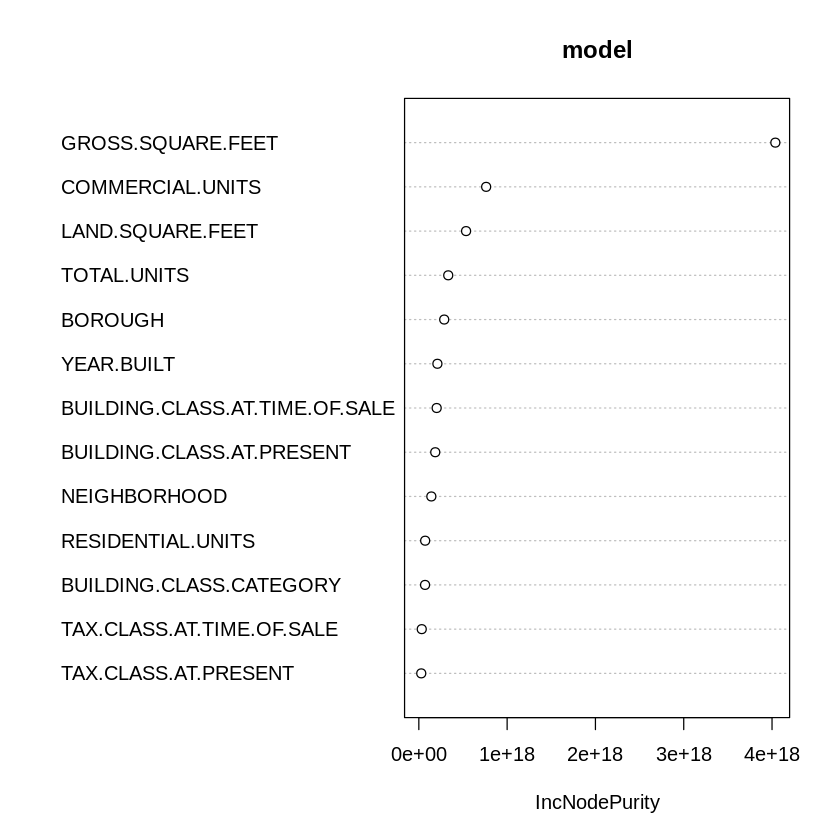

In [23]:
varImpPlot(model)

The plot above shows the importance of each variable in the model. If a variable is very important to the model, then that variable is used many times in decision trees and is highly indicitave of what a property's sale price will be. Evidently the model believes gross square feet is the most important factor for determining the sale price of a property by a wide margin. The tax class is not very useful for determining sale price.

In [24]:
nyc_test <- nyc_test %>%
    mutate(yhat = predict(model, newdata=nyc_test)) %>%
    mutate(residual = SALE.PRICE - yhat)

Warning message:
“Removed 9047 rows containing missing values (`geom_point()`).”


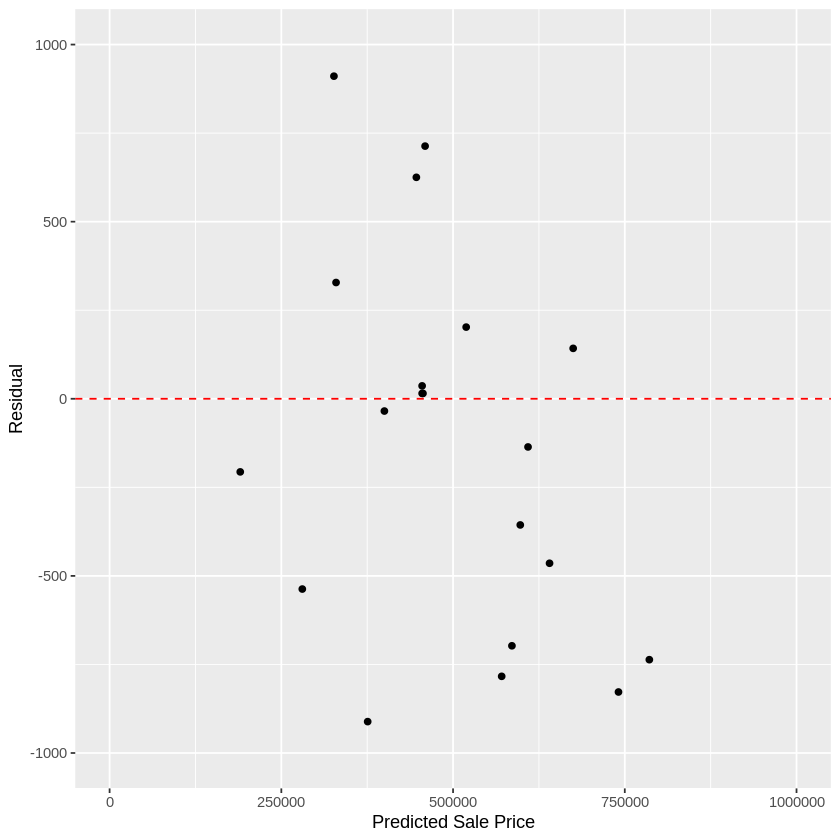

In [25]:
ggplot(nyc_test) +
  geom_point(aes(x=yhat, y=residual)) +
  geom_hline(aes(yintercept=0), linetype="dashed", color="red") +
  xlim(0, 1e+06) +
  ylim(-1000,1000) +
  xlab("Predicted Sale Price") +
  ylab("Residual")

This residual plot shows the random spread of the errors, or that there is no pattern in the errors, which is a good sign that the model can fit the data well. You may question that the residuals are fairly far off the y = 0 line, but when predicting sale price for houses costing hundreds of thousands of dollars to even millions and only being off a few hundred dollars is not that bad. However we run into an issue with the model when we check the standard deviations of the training and testing set:

In [27]:
train_predict <- predict(model, newdata=nyc_train)
test_predict  <- predict(model, newdata=nyc_test)

In [28]:
sd(train_predict)

[1] 10542898

In [29]:
sd(test_predict)

[1] 8537011

We can see that while the standard deviations of the residuals of the training set is higher than the testing set, which is a good sign that our model isn't overfitting, but these standard deviations are incredibly high, why? Well when we create a graph to see what a standard error looks like for the model:

Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


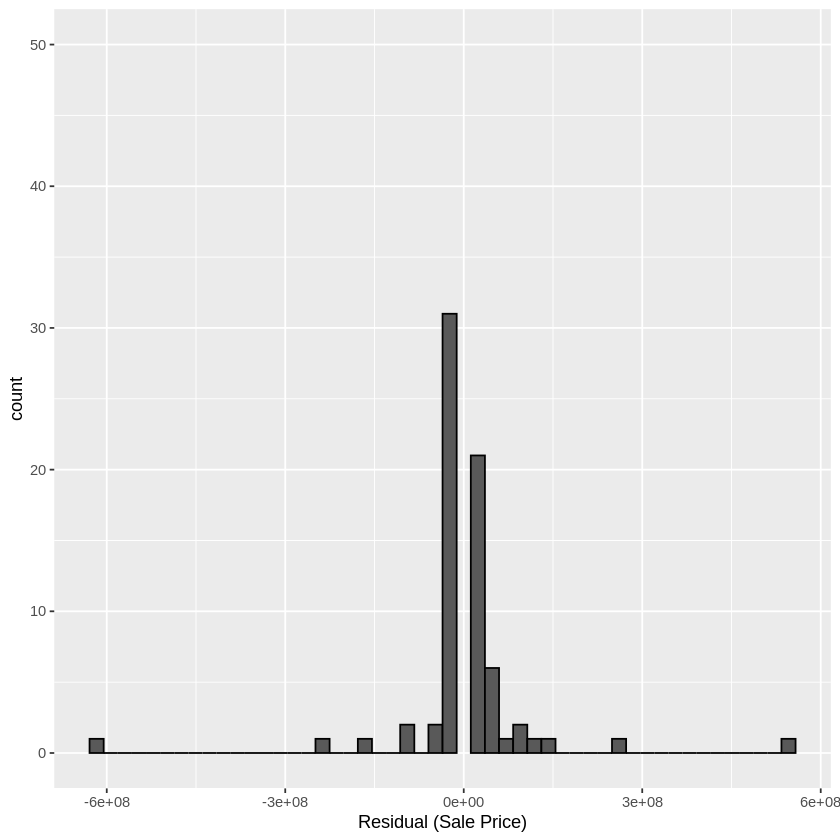

In [32]:
ggplot(nyc_test) +
  geom_histogram(aes(x=residual), bins=50, color="black") +
  xlab("Residual (Sale Price)") +
  ylim(0, 50)

We can see from this graph that a standard error for the model is close to 0, which means most of the errors on our models predictions are not significant errors. Unforunately we can see that there are two outliers at the edges of the graph that are throwing off the standard deviations of the model.

The model overall did not perform as best as we would have liked it to. The model didn't overfit and the residuals were randomly distibuted around the y=0 line which are good signs for the model however, the residual errors were very high, as can be seen by the number of residuals that are very far away from the y=0 line. A better model would have a tighter spread around the y=0 line, and there are a number of ways our model could be improved.

We could give the model more parameters pertaining to the properties, such as the type of architecture and decor, the property damages, and any other issues involved with the property. These qualities of the properties were not in this dataset, so we would of had to find another dataset and merge the datasets. This possibly could have improved the accuracy of the model  since it strongly weighted gross square feet. Another option we could have looked at would be to change the model type or implement some method to deal with the outliers. Two such models that we found were the Huber and RANSAC regression models which were made to deal with datasets that have outliers that are throwing off the accuracy of the model. (Note: Within the confines of this class we were restricted to using linear, logistic, decision tree, or random forest models, so we did not explore the potential improvement these other models could have.)

# 4. Conclusion

Firstly, the dataset required much cleaning to be used, there were so many missing values or issues that had to be remedied. This is because of how many special cases there are in the real-estate market, such as properties being lended, handed over, or just a lack of information about the properties. In our first section we gathered land square feet and gross square feet differ by decade. Over time, it could be attributed to architectural changes and other outside factors. In the third section we figured out that the relationship between sale price and all the variables is not linear at all times, and there are a lot of factors that effect sale price. After that residential units are currently selling for higher prices as compared to commercial units, likely due to the COVID-19 pandemic. And our regression model taught us the importance of the amount of price being the most important factor for determining sale price from a machine learning standpoint. Overall we learned that there are many factors that effect the sale price of a property and proper research is required beyond just the data given to us.

Possible improvements to our analysis: we could have focused on a particular type of building, such as apartments, or single/double family dwellings, to better identify trends. In our analysis we had any type of building put together to try to identify general trends across the market. If we wanted to find more specific and accurate information we could have just focused on one building type. There also wasn't a lot of information pertaining to each property, such as number of bathrooms, kitchens, air conditioning, and other details that effect a lot of the things we talked about, finding a dataset with this information and merging them could have improved our model at the end.

### Sources:
[Visual Capitalist: U.S. Home Price Growth Over 50 Years
](www.visualcapitalist.comchart-u-s-home-price-growth-over-50-years/.)

  [Economic History Association: The U.S. Economy in the 1920s
](https://eh.net/encyclopedia/the-u-s-economy-in-the-1920s/)

[Widewalls: Masterworks of the 1920s Architecture](https://www.widewalls.ch/magazine/1920s-architecture
)

[Arch Daily](https://www.archdaily.com/429668/architecture-city-guide-modern-new-york)

[Spectrum News](https://ny1.com/nyc/all-boroughs/news/2023/08/07/growing-number-of-buildings-in-nyc-worth-less-than-debt-owed#:~:text=New%20data%20shows%20a%20growing,way%20many%20New%20Yorkers%20work.)

[NVIDIA Developer](https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/)